In [1]:
import tensorflow as tf

In [5]:
model = tf.keras.models.load_model("cats_and_dogs_small_2.h5")

In [6]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
(1, 150, 150, 3)


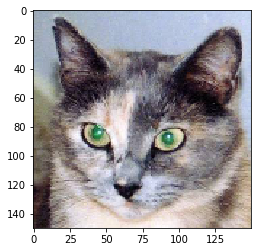

In [20]:
img_path = '/users/yzq/Desktop/all/cats_and_dogs_small/test/cats/cat.1700.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
#把图片缩小为150*150像素
img = image.load_img(img_path, target_size = (150,150))
print(type(img))
img_tensor = image.img_to_array(img)
print(type(img))
img_tensor = np.expand_dims(img_tensor, axis = 0)

#把像素点取值变换到[0,1]之间
img_tensor /= 255.
print(img_tensor.shape)
plt.figure()
plt.imshow(img_tensor[0])

8
(1, 148, 148, 32)


<Figure size 432x288 with 0 Axes>

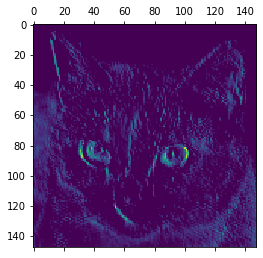

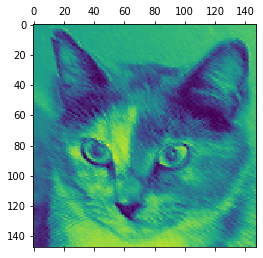

In [49]:
from tensorflow.keras import models
import matplotlib.pyplot as plt
'''
我们把网络的前8层，也就是含有卷积和max pooling的网络层抽取出来，
下面代码会把前八层网络的输出结果放置到数组layers_outputs中
'''
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)
#执行下面代码后，我们能获得卷积层和max pooling层对图片的计算结果
activations = activation_model.predict(img_tensor)
print(len(activations))
#我们把第一层卷积网络对图片信息的识别结果绘制出来
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.figure()
# for i in range(32):
plt.matshow(first_layer_activation[0, :, : , 7], cmap="viridis")
plt.matshow(first_layer_activation[0, :, : , 8], cmap="viridis")

(296, 2368)
(148, 1184)
(288, 1152)
(144, 576)
(272, 544)
(136, 272)
(120, 240)
(56, 112)


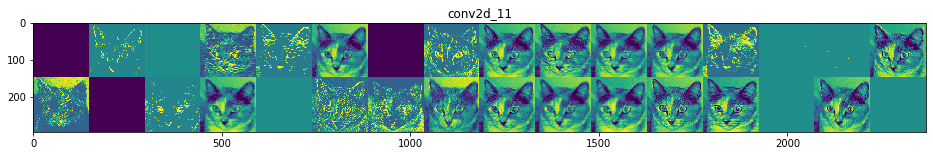

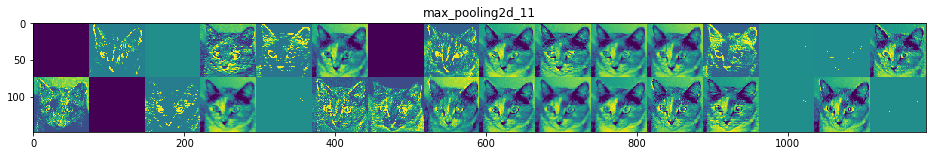

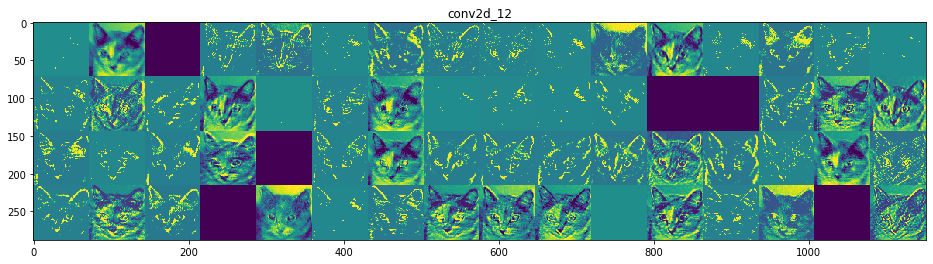

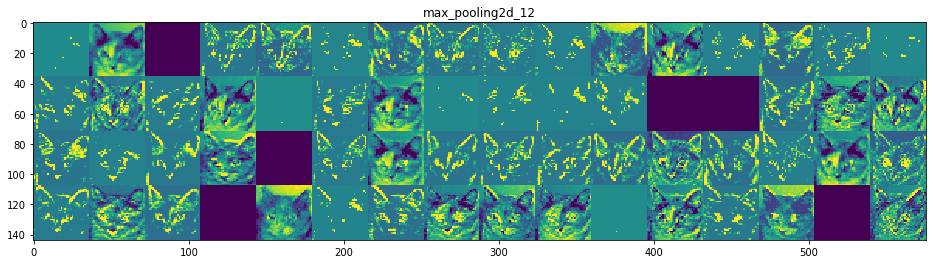

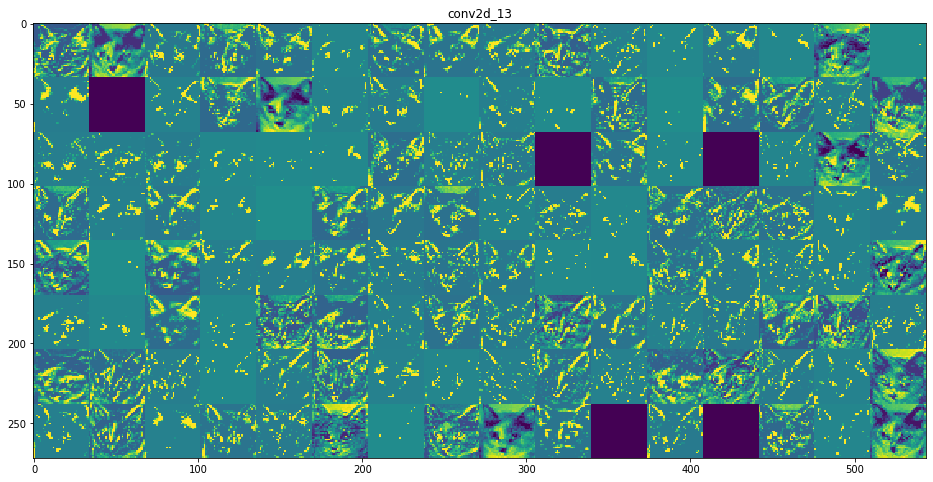

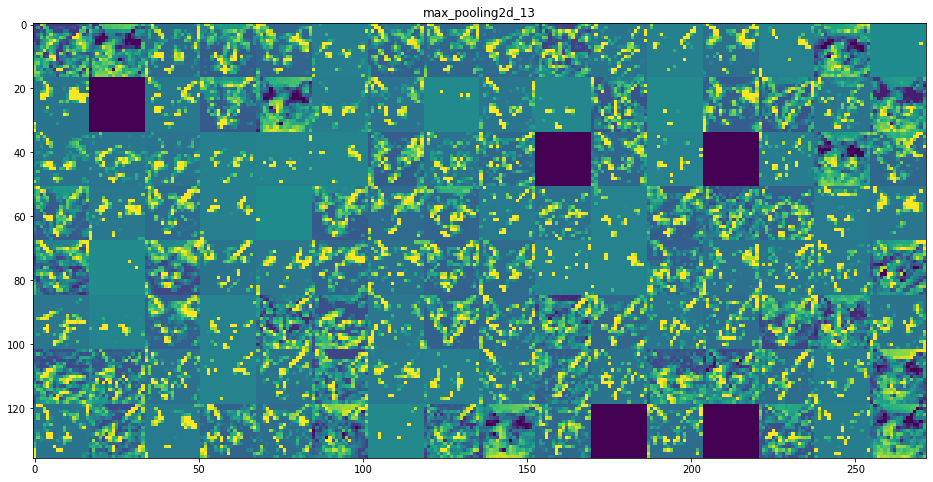

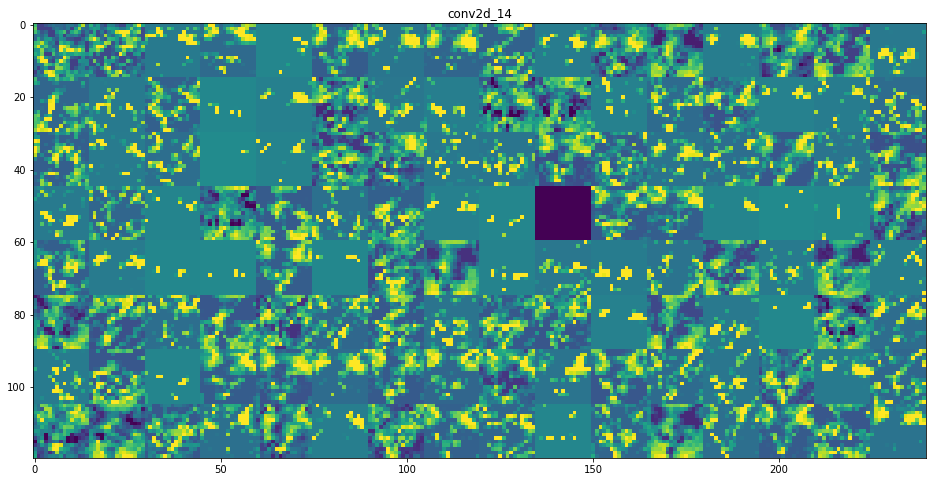

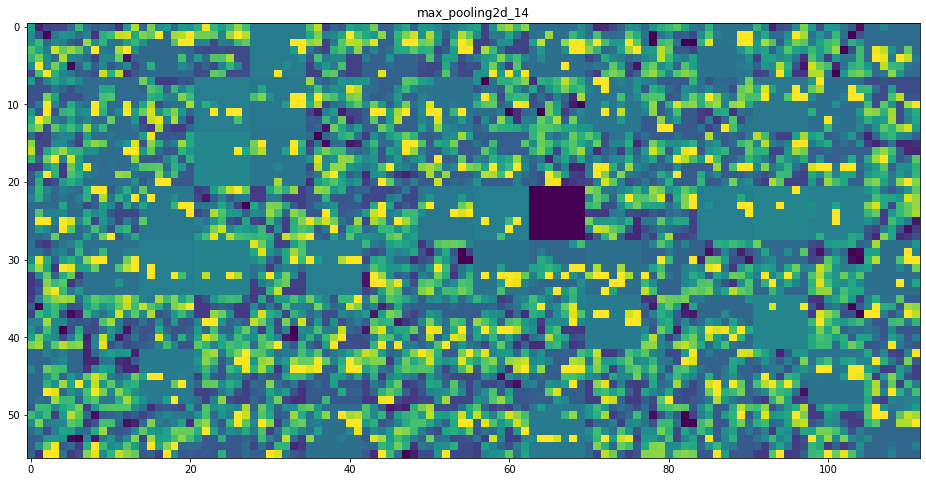

In [43]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    #layer_activation的结构为(1, width, height, array_len)
    #向量中的元素个数
    n_features = layer_activation.shape[-1]
    #获得切片的宽和高
    size = layer_activation.shape[1]
    #在做卷积运算时，我们把图片进行3*3切片，然后计算出一个含有32个元素的向量，这32个元素代表着网络从3*3切片中抽取的信息
    #我们把这32个元素分成6列，绘制在一行里
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    print(display_grid.shape)
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, : , :, col * images_per_row  + row]
            #这32个元素中，不一定每个元素对应的值都能绘制到界面上，所以我们对它做一些处理，使得它能画出来
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
    